In [1]:
import uproot	
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import awkward as ak
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
# file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")
file = uproot.open(
    "tracking_losses_ntuple_B_rad_length_beginVelo2endVelo.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()

electrons = allcolumns[(allcolumns.isElectron) & (allcolumns.fromB)]

In [3]:
p = ak.to_numpy(electrons["p"])
p_velo = ak.to_numpy(electrons["p_end_velo"])
p_ut = ak.to_numpy(electrons["p_end_ut"])

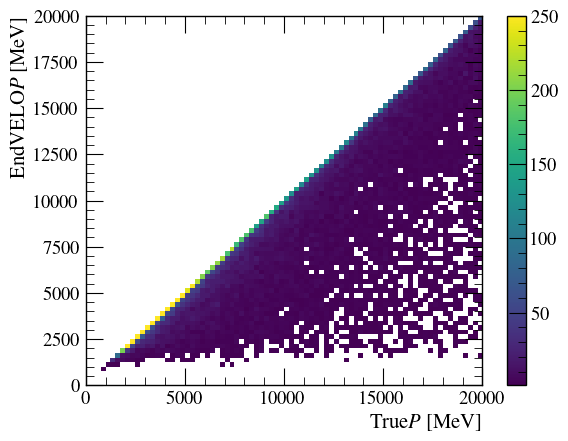

In [10]:
xlim = 20000
ax = plt.hist2d(p, p_velo, bins=80, range=[[0, xlim], [0, xlim]], cmin=1, vmax=250)
plt.colorbar(ax[3])
plt.xlabel(f"True$P$ [MeV]")
plt.ylabel(f"EndVELO$P$ [MeV]")
plt.show()

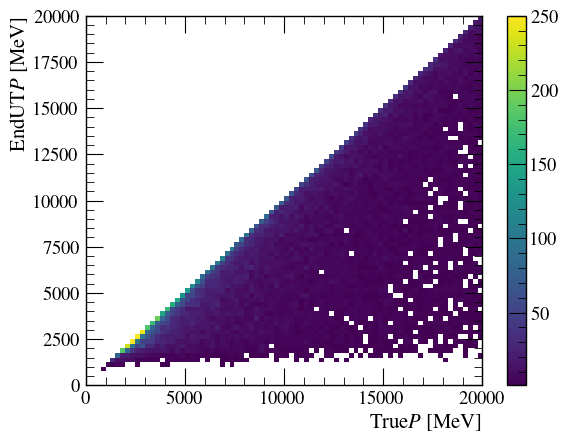

In [11]:
xlim = 20000
ax = plt.hist2d(p,
                p_ut,
                bins=80,
                range=[[0, xlim], [0, xlim]],
                cmin=1,
                vmax=250)
plt.colorbar(ax[3])
plt.xlabel(f"True$P$ [MeV]")
plt.ylabel(f"EndUT$P$ [MeV]")
plt.show()

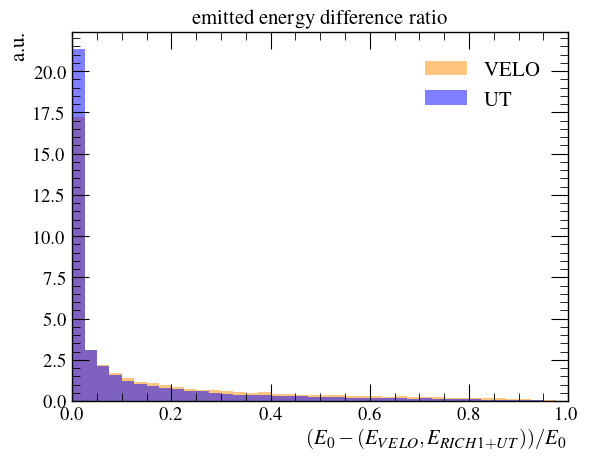

In [21]:
dvelo = p - p_velo
dut = p - p_ut - dvelo
xlim = 1
nbins = 80

plt.hist(
    dvelo / p,
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="darkorange",
    label="VELO",
    range=[-xlim, xlim],
)
plt.hist(
    dut / p,
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="blue",
    label="UT",
    range=[-xlim, xlim],
)
plt.xlim(0, xlim)
# plt.yscale("log")
plt.title("emitted energy difference ratio")
plt.xlabel(r"$(E_0 - (E_{VELO} , E_{RICH1+UT}))/E_0$")
plt.ylabel("a.u.")
plt.legend()
plt.show()

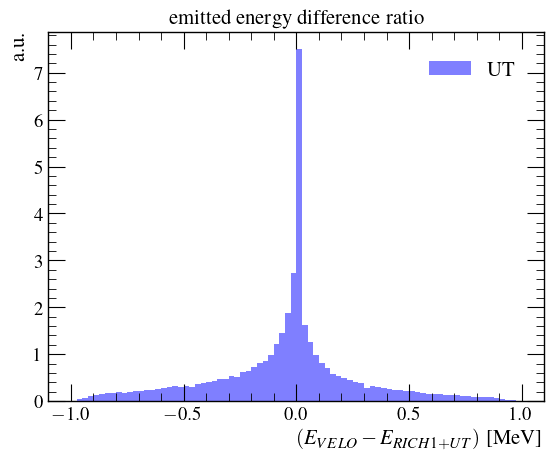

In [19]:
plt.hist(
    (dut - dvelo) / p,
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="blue",
    label="UT",
    range=[-xlim, xlim],
)
# plt.xlim(0, xlim)
# plt.yscale("log")
plt.title("emitted energy difference ratio")
plt.xlabel(r"$(E_{VELO} - E_{RICH1+UT})$ [MeV]")
plt.ylabel("a.u.")
plt.legend()
plt.show()